## 1. Import required packages

In [1]:

# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from numpy import arange

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn-v0_8') # a style that can be used for plots - see style reference above
print(plt.style.available)

# trick to widen the screen
from IPython.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 2. Import  the dataset DF_AH.csv and  Exploratory Data Analysis(15 points)
* The dataset DF_AH.csv is exported from the data data preprocessing notebook after we removed the outliars, and doing some feature engineering. This dataset contains 92 variables including the target variable.
* Do the exploratory data analysis to gain better insights on the data

In [2]:
df_AH = pd.read_csv("Dataset/DF_AH.csv")

df_AH.info()
#hello

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

## 3. Perform additional Feature Engineering(10 points)

1) Identify the unique number of foundation types

In [3]:
print(df_AH['Foundation'].unique())
print(len(df_AH['Foundation'].unique()))

['CBlock' 'PConc' 'Wood' 'BrkTil' 'Slab' 'Stone']
6


2) Create the dummy variable for the foundation type

In [4]:
foundation_dummies = pd.get_dummies(df_AH['Foundation'], prefix='Foundation_')
pd.concat([df_AH, foundation_dummies], axis=1)
df_AH = df_AH.drop('Foundation', axis=1)
df_AH.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


3) Identify the all the unique neighbourhood

In [5]:
print(df_AH['Neighborhood'].unique())
print(len(df_AH['Neighborhood'].unique()))

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
28



4) Create the dummy variable for the neighbourhood

In [6]:
#Riccardo
neighborhood_dummies = pd.get_dummies(df_AH['Neighborhood'], prefix='Neighborhood_')
pd.concat([df_AH, neighborhood_dummies], axis=1)
df_AH = df_AH.drop('Neighborhood', axis=1)
df_AH.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


5) Look at the DF_AH.info() and drop all the variables that have Non-Null count less than 2500.

In [7]:
#Riccardo
df_AH = df_AH.loc[:, df_AH.count() >= 2500]
df_AH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

## 4.  Impute the data (10 points)

1) Check whether each of the variables have missing values


In [8]:
#Riccardo
df_AH.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Bsmt Qual           79
Bsmt Cond           79
Bsmt Exposure       82
BsmtFin Type 1      79
BsmtFin SF 1         0
BsmtFin Type 2      80
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full B

1746


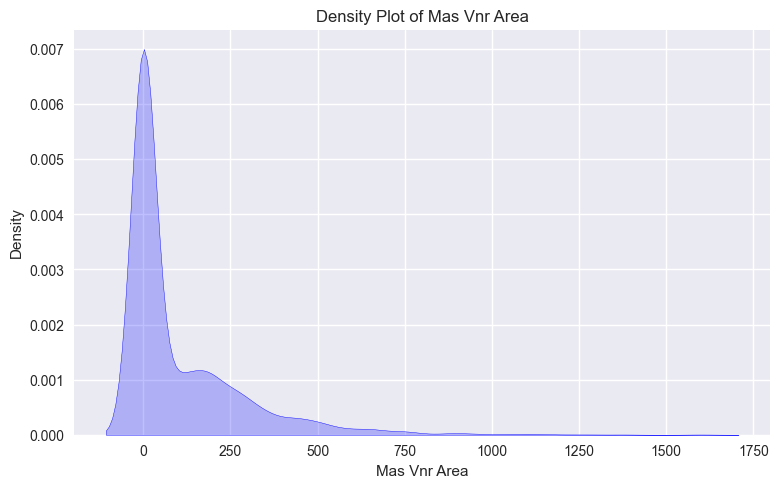

In [9]:
# why is Mas Vnr Area null?

# this shows that null is not meant to represent 0, since MsVnrArea has several values that are 0. 
# This implies that Mas Vnr Area is null by mistake
isMsVnrZero = df_AH[df_AH['Mas Vnr Area'] == 0]
print(len(isMsVnrZero)) 

# since null doesn't signify 0, we do a describe to see which imputation method would be best
df_AH['Mas Vnr Area'].describe()

# this shows that it is massively right skewed, so median is a better choice of imputation than average
plt.figure(figsize=(8,5))
sns.kdeplot(df_AH["Mas Vnr Area"].dropna(), color='blue', fill=True)

plt.xlabel("Mas Vnr Area")
plt.ylabel("Density")
plt.title("Density Plot of Mas Vnr Area")
plt.show()

In [10]:
# investigate into why electrical is null
electricNull = df_AH[df_AH['Electrical'].isnull()]
electricNull.head()

print(df_AH['Electrical'].unique())

['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan 'Mix']


In [11]:
# investigate into why Bsmt Full/Half Bath are null
bsmtFullNull = df_AH[df_AH['Bsmt Full Bath'].isnull()] 
bsmtHalfNull = df_AH[df_AH['Bsmt Half Bath'].isnull()] 
bsmtFullNull.head()
bsmtHalfNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
1496,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,No,0,7,2008,WD,Normal,284700,3820.0,3820,372,NaN,0,1,1,0,1,0,1


In [12]:
# investigation into why TotalBathrooms is null
totalBathNull = df_AH[df_AH['TotalBathrooms'].isnull()]
totalBathNull.head()
# this ^ shows that it seems like the data just was corrupted, however it seems that it can be easily filled
# by adding the half bath number and full bath number

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
1496,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,No,0,7,2008,WD,Normal,284700,3820.0,3820,372,NaN,0,1,1,0,1,0,1


In [13]:
# investigation into why basement values are null

# since all of these values are categorical and lack a "No basement" equivalent field,
# that's probably what null is supposed to mean
print(df_AH['Bsmt Qual'].unique())
print(df_AH['Bsmt Cond'].unique())
print(df_AH['Bsmt Exposure'].unique())
print(df_AH['BsmtFin Type 1'].unique())
print(df_AH['BsmtFin Type 2'].unique())

['TA' 'Gd' 'Ex' nan 'Fa' 'Po']
['Gd' 'TA' nan 'Po' 'Fa' 'Ex']
['Gd' 'No' 'Mn' 'Av' nan]
['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' nan]
['Unf' 'LwQ' 'BLQ' 'Rec' nan 'GLQ' 'ALQ']


In [14]:
# investigation into why garage values are null

# here we can see that these also lack a "No garage" value like the basements. 
print(df_AH['Garage Type'].unique())
print(df_AH['Garage Finish'].unique())
print(df_AH['Garage Cars'].unique())
print(df_AH['Garage Qual'].unique())
print(df_AH['Garage Cond'].unique())


# an exception is the garage cars and garage area fields, which both only have 1 null value.
# this would imply that they are null by mistake

['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']
['Fin' 'Unf' 'RFn' nan]
[ 2.  1.  3.  0.  4.  5. nan]
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


In [15]:
# this shows that all of the data for this row seems to be corrupted
garageCarNull = df_AH[df_AH['Garage Cars'].isnull()]
garageCarNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
2231,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909,2687.0,1828,212,2.0,1,0,1,0,1,0,1


In [16]:
# this is the same row as the garage car corruption
garageAreaNull = df_AH[df_AH['Garage Area'].isnull()]
garageCarNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
2231,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909,2687.0,1828,212,2.0,1,0,1,0,1,0,1


2) Impute the missing values using appropriate method and explain why you use that method?

In [17]:
# delete the corrupted line since there's only one line that has been corrupted
df_AH = df_AH[df_AH['PID'] != 910201180]

In [18]:
# For all of the categorical data missing a not applicable field, a value of "NA" is added instead of null
df_AH['Bsmt Qual'].fillna("NA", inplace=True)
df_AH['Bsmt Cond'].fillna("NA", inplace=True)
df_AH['Bsmt Exposure'].fillna("NA", inplace=True)
df_AH['BsmtFin Type 1'].fillna("NA", inplace=True)
df_AH['BsmtFin Type 2'].fillna("NA", inplace=True)
df_AH['Garage Type'].fillna("NA", inplace=True)
df_AH['Garage Finish'].fillna("NA", inplace=True)
df_AH['Garage Qual'].fillna("NA", inplace=True)
df_AH['Garage Cond'].fillna("NA", inplace=True)

In [19]:
# inpute 0 for GarageYrBuilt to signify that there is no garage
df_AH['Garage Yr Blt'].fillna(0, inplace=True)

In [20]:
# for Mas Vnr Area, do median as imputation since it is massively right skewed
msVnrAreaMedian = df_AH['Mas Vnr Area'].median()
df_AH['Mas Vnr Area'].fillna(msVnrAreaMedian, inplace=True)

In [21]:
# for electrical, Bsmt Full Bath, and Bsmt Half Bath delete rows since they are an insignificant
# amount of the data that seems to be corrupted
cols_to_drop = ['Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_AH = df_AH.dropna(subset=cols_to_drop)

In [22]:
# for total bath, fill in missing value with 4: 3 Full bathrooms, 1 Half bathroom
df_AH['TotalBathrooms'].fillna(4, inplace=True)

In [23]:
df_AH.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr

3) Look at the data and for remaining categorical variable, create the dummy variable, or drop the variable. Explain your reasoning.

In [24]:
def create_dummies(df, col):
    dummies = pd.get_dummies(df[col], prefix=(col + "_"))
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
    return df
    

In [25]:
object_columns = df_AH.select_dtypes(include=['object']).columns
for obj in object_columns:
    df_AH = create_dummies(df_AH, obj)

In [26]:
df_AH.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,MS Zoning__A (agr),MS Zoning__C (all),MS Zoning__FV,MS Zoning__I (all),MS Zoning__RH,MS Zoning__RL,MS Zoning__RM,Street__Grvl,Street__Pave,Lot Shape__IR1,Lot Shape__IR2,Lot Shape__IR3,Lot Shape__Reg,Land Contour__Bnk,Land Contour__HLS,Land Contour__Low,Land Contour__Lvl,Utilities__AllPub,Utilities__NoSeWa,Utilities__NoSewr,Lot Config__Corner,Lot Config__CulDSac,Lot Config__FR2,Lot Config__FR3,Lot Config__Inside,Land Slope__Gtl,Land Slope__Mod,Land Slope__Sev,Condition 1__Artery,Condition 1__Feedr,Condition 1__Norm,Condition 1__PosA,Condition 1__PosN,Condition 1__RRAe,Condition 1__RRAn,Condition 1__RRNe,Condition 1__RRNn,Condition 2__Artery,Condition 2__Feedr,Condition 2__Norm,Condition 2__PosA,Condition 2__PosN,Condition 2__RRAe,Condition 2__RRAn,Condition 2__RRNn,Bldg Type__1Fam,Bldg Type__2fmCon,Bldg Type__Duplex,Bldg Type__Twnhs,Bldg Type__TwnhsE,House Style__1.5Fin,...,Bsmt Cond__NA,Bsmt Cond__Po,Bsmt Cond__TA,Bsmt Exposure__Av,Bsmt Exposure__Gd,Bsmt Exposure__Mn,Bsmt Exposure__NA,Bsmt Exposure__No,BsmtFin Type 1__ALQ,BsmtFin Type 1__BLQ,BsmtFin Type 1__GLQ,BsmtFin Type 1__LwQ,BsmtFin Type 1__NA,BsmtFin Type 1__Rec,BsmtFin Type 1__Unf,BsmtFin Type 2__ALQ,BsmtFin Type 2__BLQ,BsmtFin Type 2__GLQ,BsmtFin Type 2__LwQ,BsmtFin Type 2__NA,BsmtFin Type 2__Rec,BsmtFin Type 2__Unf,Heating__Floor,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Heating QC__Ex,Heating QC__Fa,Heating QC__Gd,Heating QC__Po,Heating QC__TA,Central Air__N,Central Air__Y,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Kitchen Qual__Ex,Kitchen Qual__Fa,Kitchen Qual__Gd,Kitchen Qual__Po,Kitchen Qual__TA,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,Functional__Sev,Functional__Typ,Garage Type__2Types,Garage Type__Attchd,Garage Type__Basment,Garage Type__BuiltIn,Garage Type__CarPort,Garage Type__Detchd,Garage Type__NA,Garage Finish__Fin,Garage Finish__NA,Garage Finish__RFn,Garage Finish__Unf,Garage Qual__Ex,Garage Qual__Fa,Garage Qual__Gd,Garage Qual__NA,Garage Qual__Po,Garage Qual__TA,Garage Cond__Ex,Garage Cond__Fa,Garage Cond__Gd,Garage Cond__NA,Garage Cond__Po,Garage Cond__TA,Paved Drive__N,Paved Drive__P,Paved Drive__Y,Fence__GdPrv,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No,Sale Type__COD,Sale Type__CWD,Sale Type__Con,Sale Type__ConLD,Sale Type__ConLI,Sale Type__ConLw,Sale Type__New,Sale Type__Oth,Sale Type__VWD,Sale Type__WD,Sale Condition__Abnorml,Sale Condition__AdjLand,Sale Condition__Alloca,Sale Condition__Family,Sale Condition__Normal,Sale Condition__Partial
0,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,F

## 5. Create the train/test data and scaling (5 points)

1) Split the data into training and test set with training on 80 percent. You may use the following code 


In [27]:
X = df_AH.drop('SalePrice', axis = 1) #keep features only for X
y = df_AH['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


2) Standardize the data using standard scaler, then you will be building the regression models suing the scaled data.

In [28]:
#Riccardo and Chandler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## 6.  Build the Multiple Regression Model (10 points)

(a)  Build a multiple regression model using backwards elimination. To do this follow the following steps:

(1) Build initial model 

In [29]:
X_reg = X_train_scaled
y_reg = y_train

X_reg.reset_index(drop=True, inplace=True)
y_reg.reset_index(drop=True, inplace=True)

X_reg = sm.add_constant(X_reg) # adding a constant
 
initial_model = sm.OLS(y_reg, X_reg).fit()
pred = initial_model.predict(X_reg) 
 
initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     131.1
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:27:07   Log-Likelihood:                -26470.
No. Observations:                2337   AIC:                         5.338e+04
Df Residuals:                    2117   BIC:                         5.465e+04
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.799e+05    436.467    412.098      0.000    1.79e+05    1.81e+05
PID                     -1717.4477    592.872     -2.897      0.004   -2880.121    -554.774
MS SubClass              2899.5763   2322.424      1.249      0.212   -1654.896    7454.048
Lot Frontage              972.6900    536.557      1.813      0.070     -79.544    2024.924
Lot Area                 5727.6070    673.864      8.500      0.000    4406.102    7049.112
Overall Qual             1.237e+04    957.605     12.917      0.000    1.05e+04    1.42e+04
Overall Cond             5709.8217    680.830      8.387      0.000    4374.656    7044.987
Year Built               7004.3809   1504.369      4.656      0.000    4054.185    9954.577
Year Remod/Add            838.8152    863.172      0.972      0.331    -853.939    2531.569
Mas Vnr Area             3448.1827    571.204      6.037      0.000    2328.003    4568.363
BsmtFin SF 1             6390.1357    635.887     10.049      0.000    5143.106    7637.165
BsmtFin SF 2             3004.3930    853.661      3.519      0.000    1330.292    4678.495
Bsmt Unf SF             -1726.9674    557.624     -3.097      0.002   -2820.516    -633.419
Total Bsmt SF            6062.4968    802.716      7.552      0.000    4488.303    7636.690
1st Flr SF               2121.1815   1001.100      2.119      0.034     157.940    4084.423
2nd Flr SF               7915.2503    910.781      8.691      0.000    6129.131    9701.369
Low Qual Fin SF           181.3934    533.687      0.340      0.734    -865.212    1227.999
Gr Liv Area              8580.5524    492.260     17.431      0.000    7615.189    9545.916
Bsmt Full Bath            662.3865    571.728      1.159      0.247    -458.821    1783.594
Bsmt Half Bath           -365.3254    487.544     -0.749      0.454   -1321.441     590.790
Full Bath                  24.9615    605.369      0.041      0.967   -1162.218    1212.141
Half Bath                 144.1437    670.030      0.215      0.830   -1169.842    1458.129
Bedroom AbvGr           -3517.9431    776.211     -4.532      0.000   -5040.159   -1995.728
Kitchen AbvGr           -2925.3395    868.260     -3.369      0.001   -4628.071   -1222.608
TotRms AbvGrd             344.1886    996.673      0.345      0.730   -1610.372    2298.749
Fireplaces               1911.9310    586.941      3.257      0.001     760.889    3062.973
Garage Yr Blt             378.9669   1.75e+04      0.022      0.983   -3.39e+04    3.46e+04
Garage Cars              3373.7666   1172.899      2.876      0.004    1073.612    5673.921
Garage Area              3218.0608   1116.768      2.882      0.004    1027.984    5408.138
Wood Deck SF             2018.9340    520.285      3.880      0.000     998.611    3039.257
Open Porch SF             -32.0058    456.547  

(2) Review p-values

    - if a p-value is > 0.05 then eliminate the highest p-value and go to step 3
    - **if all p-values are less than 0.05 then your model is complete**

In [30]:
def view_pvals(model):
    # Print all of the pvalues for the variables
    p_values = model.pvalues[1:]
    for pred, pval in p_values.items():
        print(f"{pred}: {pval:.4f}")


In [31]:
view_pvals(initial_model)

PID: 0.0038
MS SubClass: 0.2120
Lot Frontage: 0.0700
Lot Area: 0.0000
Overall Qual: 0.0000
Overall Cond: 0.0000
Year Built: 0.0000
Year Remod/Add: 0.3313
Mas Vnr Area: 0.0000
BsmtFin SF 1: 0.0000
BsmtFin SF 2: 0.0004
Bsmt Unf SF: 0.0020
Total Bsmt SF: 0.0000
1st Flr SF: 0.0342
2nd Flr SF: 0.0000
Low Qual Fin SF: 0.7340
Gr Liv Area: 0.0000
Bsmt Full Bath: 0.2468
Bsmt Half Bath: 0.4537
Full Bath: 0.9671
Half Bath: 0.8297
Bedroom AbvGr: 0.0000
Kitchen AbvGr: 0.0008
TotRms AbvGrd: 0.7299
Fireplaces: 0.0011
Garage Yr Blt: 0.9827
Garage Cars: 0.0041
Garage Area: 0.0040
Wood Deck SF: 0.0001
Open Porch SF: 0.9441
Enclosed Porch: 0.7653
3Ssn Porch: 0.9484
Screen Porch: 0.0000
Pool Area: 0.0003
Misc Val: 0.6342
Mo Sold: 0.7498
Yr Sold: 0.0119
TotalSF: 0.0000
TotalFloorSF: 0.0000
TotalPorchSF: 0.0004
TotalBathrooms: 0.3132
HasBasement: 0.1238
HasGarage: 0.9147
HasPorch: 0.0641
HasPool: 0.0000
WasRemodeled: 0.4148
IsNew: 0.0362
WasCompleted: 0.8447
MS Zoning__A (agr): 0.8624
MS Zoning__C (all): 0.

In [32]:
def backward_elimination(X_train, y_train, significance_level=0.05):
    # Reset indices to ensure alignment to take care of index issues after scaling
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    
    # Add the constant
    X_train = sm.add_constant(X_train)

    # Fit the initial model
    ols_model = sm.OLS(y_train, X_train).fit()

    # Set the initial variable for the while loop
    max_p_value = 0.99
    iteration = 0
    excluded_features = []

    # Build the while loop under the condition that the max p-value needs to be greater than the significance level
    while max_p_value > significance_level:
        p_values = ols_model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            max_p_value_predictor = p_values.idxmax()
            excluded_features.append(max_p_value_predictor)

            # Create a new DataFrame with the remaining features and add the constant
            X_subset = X_train.drop(columns=excluded_features)
            X_subset = sm.add_constant(X_subset)

            ols_model = sm.OLS(y_train, X_subset).fit()
            iteration += 1
            print(f"Iteration {iteration}: Max p-value = {max_p_value}, Removed feature: {max_p_value_predictor}")

    # Display the final summary
    model_summary = ols_model.summary()
    print(model_summary)

    return ols_model, excluded_features


In [33]:
print(type(X_reg))

<class 'pandas.core.frame.DataFrame'>


In [34]:
trimmed_model, excluded_features = backward_elimination(X_reg, y_reg)

Iteration 1: Max p-value = 0.9893531198363408, Removed feature: Heating__Wall
Iteration 2: Max p-value = 0.9863510246327878, Removed feature: Heating__GasW
Iteration 3: Max p-value = 0.9827679416591086, Removed feature: Garage Yr Blt
Iteration 4: Max p-value = 0.9692230768391977, Removed feature: Exterior 1st__BrkComm
Iteration 5: Max p-value = 0.9656573447630852, Removed feature: Full Bath
Iteration 6: Max p-value = 0.951189823566525, Removed feature: Paved Drive__P
Iteration 7: Max p-value = 0.9981211608779617, Removed feature: Paved Drive__Y
Iteration 8: Max p-value = 0.9482298530127522, Removed feature: 3Ssn Porch
Iteration 9: Max p-value = 0.9605817159607382, Removed feature: Enclosed Porch
Iteration 10: Max p-value = 0.934817114938596, Removed feature: Utilities__NoSeWa
Iteration 11: Max p-value = 0.9347527743207279, Removed feature: Exterior 2nd__MetalSd
Iteration 12: Max p-value = 0.9382722422263248, Removed feature: Exterior 2nd__Wd Sdng
Iteration 13: Max p-value = 0.924260113

In [35]:
results = trimmed_model.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred = stat_sig_Pred[~np.isin(stat_sig_Pred, excluded_features)]
stat_sig_Pred

array(['const', 'PID', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Screen Porch',
       'Pool Area', 'Yr Sold', 'TotalSF', 'HasBasement', 'HasPool',
       'IsNew', 'MS Zoning__FV', 'MS Zoning__RL', 'Street__Grvl',
       'Street__Pave', 'Land Contour__HLS', 'Lot Config__CulDSac',
       'Land Slope__Mod', 'Land Slope__Sev', 'Condition 1__Artery',
       'Condition 1__Norm', 'Condition 1__PosN', 'Condition 2__PosA',
       'Bldg Type__1Fam', 'Bldg Type__Twnhs', 'House Style__1Story',
       'House Style__2.5Fin', 'Roof Style__Mansard',
       'Exterior 1st__BrkFace', 'Exterior 1st__CemntBd',
       'Exterior 1st__HdBoard', 'Exterior 1st__Plywood',
       'Exterior 1st__PreCast', 'Exterior 1st__Wd Sdng',
       'Exterior 2nd__

array(['PID', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Screen Porch', 'Pool Area',
       'Yr Sold', 'TotalSF', 'HasBasement', 'HasPool', 'IsNew',
       'MS Zoning__FV', 'MS Zoning__RL', 'Street__Grvl', 'Street__Pave',
       'Land Contour__HLS', 'Lot Config__CulDSac', 'Land Slope__Mod',
       'Land Slope__Sev', 'Condition 1__Artery', 'Condition 1__Norm',
       'Condition 1__PosN', 'Condition 2__PosA', 'Bldg Type__1Fam',
       'Bldg Type__Twnhs', 'House Style__1Story', 'House Style__2.5Fin',
       'Roof Style__Mansard', 'Exterior 1st__BrkFace',
       'Exterior 1st__CemntBd', 'Exterior 1st__HdBoard',
       'Exterior 1st__Plywood', 'Exterior 1st__PreCast',
       'Exterior 1st__Wd Sdng', 'Exterior 2nd__BrkFace',
      

In [36]:
print(len(stat_sig_Pred))

85


(3) Build a new model without eliminated independent variable

In [37]:
trimmed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     373.1
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:27:17   Log-Likelihood:                -26526.
No. Observations:                2337   AIC:                         5.321e+04
Df Residuals:                    2258   BIC:                         5.366e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.799e+05    432.809    415.581      0.000    1.79e+05    1.81e+05
PID                    -1580.7649    536.758     -2.945      0.003   -2633.356    -528.174
Lot Area                5359.8634    580.483      9.233      0.000    4221.528    6498.199
Overall Qual            1.333e+04    876.674     15.202      0.000    1.16e+04     1.5e+04
Overall Cond            6149.2554    536.366     11.465      0.000    5097.434    7201.077
Year Built              6731.3019    977.844      6.884      0.000    4813.735    8648.868
Mas Vnr Area            3194.3760    535.700      5.963      0.000    2143.860    4244.892
BsmtFin SF 1            5798.7461    550.671     10.530      0.000    4718.872    6878.620
BsmtFin SF 2            2685.2094    783.025      3.429      0.001    1149.685    4220.734
Bsmt Unf SF            -2744.8971    507.603     -5.408      0.000   -3740.315   -1749.480
Total Bsmt SF           4249.2027    811.720      5.235      0.000    2657.407    5840.998
2nd Flr SF              5771.0960   1314.537      4.390      0.000    3193.270    8348.922
Gr Liv Area             1.745e+04   1117.455     15.618      0.000    1.53e+04    1.96e+04
Bsmt Full Bath          1403.8027    623.910      2.250      0.025     180.306    2627.300
Bedroom AbvGr          -3633.8147    633.293     -5.738      0.000   -4875.712   -2391.917
Kitchen AbvGr          -3283.3741    585.884     -5.604      0.000   -4432.301   -2134.448
Fireplaces              1808.6835    545.734      3.314      0.001     738.491    2878.876
Garage Cars             3628.4121   1098.208      3.304      0.001    1474.810    5782.014
Garage Area             3105.1169   1005.900      3.087      0.002    1132.532    5077.702
Wood Deck SF            1968.0928    491.245      4.006      0.000    1004.753    2931.433
Screen Porch            2284.5253    460.766      4.958      0.000    1380.956    3188.094
Pool Area              -5372.0035   1139.623     -4.714      0.000   -7606.822   -3137.185
Yr Sold                -1234.2919    452.356     -2.729      0.006   -2121.369    -347.215
TotalSF                 1.361e+04    441.388     30.829      0.000    1.27e+04    1.45e+04
HasBasement            -1010.3839    184.466     -5.477      0.000   -1372.125    -648.643
HasPool                 6229.9219   1140.327      5.463      0.000    3993.724    8466.120
IsNew                   1905.2232    797.085      2.390      0.017     342.128    3468.318
MS Zoning__FV           1994.8817    572.076      3.487      0.000     873.032    3116.731
MS Zoning__RL           2429.3487    652.931      3.721      0.000    1148.941    3709.756
Street__Grvl            -723.7120    231.468     -3.127      0.002   -1177.624    -269.800
Street__Pave             723.7120    231.468      3.127      0.002     269.800  

(4) Go back to step 2

In [38]:
view_pvals(trimmed_model)

PID: 0.0033
Lot Area: 0.0000
Overall Qual: 0.0000
Overall Cond: 0.0000
Year Built: 0.0000
Mas Vnr Area: 0.0000
BsmtFin SF 1: 0.0000
BsmtFin SF 2: 0.0006
Bsmt Unf SF: 0.0000
Total Bsmt SF: 0.0000
2nd Flr SF: 0.0000
Gr Liv Area: 0.0000
Bsmt Full Bath: 0.0245
Bedroom AbvGr: 0.0000
Kitchen AbvGr: 0.0000
Fireplaces: 0.0009
Garage Cars: 0.0010
Garage Area: 0.0020
Wood Deck SF: 0.0001
Screen Porch: 0.0000
Pool Area: 0.0000
Yr Sold: 0.0064
TotalSF: 0.0000
HasBasement: 0.0000
HasPool: 0.0000
IsNew: 0.0169
MS Zoning__FV: 0.0005
MS Zoning__RL: 0.0002
Street__Grvl: 0.0018
Street__Pave: 0.0018
Land Contour__HLS: 0.0000
Lot Config__CulDSac: 0.0086
Land Slope__Mod: 0.0442
Land Slope__Sev: 0.0002
Condition 1__Artery: 0.0100
Condition 1__Norm: 0.0000
Condition 1__PosN: 0.0005
Condition 2__PosA: 0.0127
Bldg Type__1Fam: 0.0000
Bldg Type__Twnhs: 0.0094
House Style__1Story: 0.0001
House Style__2.5Fin: 0.0000
Roof Style__Mansard: 0.0024
Exterior 1st__BrkFace: 0.0000
Exterior 1st__CemntBd: 0.0003
Exterior 1s

(b) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [39]:
coefficients = trimmed_model.params
intercept = coefficients[0]

predictors = coefficients.index[1:]  # Exclude the intercept
coef_values = coefficients.values[1:]

regression_equation = f"SalePrice = {intercept:.4f}\n"
for pred, coef in zip(predictors, coef_values):
    regression_equation += f" + ({coef:.4f} * {pred})\n"

# Print the final equation
print(regression_equation)

SalePrice = 179867.2122
 + (-1580.7649 * PID)
 + (5359.8634 * Lot Area)
 + (13327.0338 * Overall Qual)
 + (6149.2554 * Overall Cond)
 + (6731.3019 * Year Built)
 + (3194.3760 * Mas Vnr Area)
 + (5798.7461 * BsmtFin SF 1)
 + (2685.2094 * BsmtFin SF 2)
 + (-2744.8971 * Bsmt Unf SF)
 + (4249.2027 * Total Bsmt SF)
 + (5771.0960 * 2nd Flr SF)
 + (17452.4618 * Gr Liv Area)
 + (1403.8027 * Bsmt Full Bath)
 + (-3633.8147 * Bedroom AbvGr)
 + (-3283.3741 * Kitchen AbvGr)
 + (1808.6835 * Fireplaces)
 + (3628.4121 * Garage Cars)
 + (3105.1169 * Garage Area)
 + (1968.0928 * Wood Deck SF)
 + (2284.5253 * Screen Porch)
 + (-5372.0035 * Pool Area)
 + (-1234.2919 * Yr Sold)
 + (13607.4871 * TotalSF)
 + (-1010.3839 * HasBasement)
 + (6229.9219 * HasPool)
 + (1905.2232 * IsNew)
 + (1994.8817 * MS Zoning__FV)
 + (2429.3487 * MS Zoning__RL)
 + (-723.7120 * Street__Grvl)
 + (723.7120 * Street__Pave)
 + (2041.0664 * Land Contour__HLS)
 + (1197.1821 * Lot Config__CulDSac)
 + (969.3738 * Land Slope__Mod)
 + (-


(5) As we used the validation set approach here, predict the y values in the test data and report the following measures of accuracy.

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
Please interpret these values.

Note: To keep the readability of Jupyter notebook, please include the initial model and the final model for the multiple regression using backward elimination.

In [40]:
trimmed_cols = stat_sig_Pred
trimmed_cols = trimmed_cols[1:] # remove constant
print(trimmed_cols)

['Lot Area' 'Overall Qual' 'Overall Cond' 'Year Built' 'Mas Vnr Area'
 'BsmtFin SF 1' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' '2nd Flr SF'
 'Gr Liv Area' 'Bsmt Full Bath' 'Bedroom AbvGr' 'Kitchen AbvGr'
 'Fireplaces' 'Garage Cars' 'Garage Area' 'Wood Deck SF' 'Screen Porch'
 'Pool Area' 'Yr Sold' 'TotalSF' 'HasBasement' 'HasPool' 'IsNew'
 'MS Zoning__FV' 'MS Zoning__RL' 'Street__Grvl' 'Street__Pave'
 'Land Contour__HLS' 'Lot Config__CulDSac' 'Land Slope__Mod'
 'Land Slope__Sev' 'Condition 1__Artery' 'Condition 1__Norm'
 'Condition 1__PosN' 'Condition 2__PosA' 'Bldg Type__1Fam'
 'Bldg Type__Twnhs' 'House Style__1Story' 'House Style__2.5Fin'
 'Roof Style__Mansard' 'Exterior 1st__BrkFace' 'Exterior 1st__CemntBd'
 'Exterior 1st__HdBoard' 'Exterior 1st__Plywood' 'Exterior 1st__PreCast'
 'Exterior 1st__Wd Sdng' 'Exterior 2nd__BrkFace' 'Exterior 2nd__PreCast'
 'Exter Qual__Ex' 'Exter Qual__TA' 'Bsmt Qual__Ex' 'Bsmt Qual__NA'
 'Bsmt Cond__NA' 'Bsmt Cond__Po' 'Bsmt Exposure__Av' 'Bsmt Expo

In [43]:
X_test_trimmed = X_test[trimmed_cols]
X_test_trimmed = sm.add_constant(X_test_trimmed)
display(X_test_trimmed)

y_hat_test_trimmed = trimmed_model.predict(X_test_trimmed)

,const,Lot Area,Overall Qual,Overall Cond,Year Built,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Screen Porch,Pool Area,Yr Sold,TotalSF,HasBasement,HasPool,IsNew,MS Zoning__FV,MS Zoning__RL,Street__Grvl,Street__Pave,Land Contour__HLS,Lot Config__CulDSac,Land Slope__Mod,Land Slope__Sev,Condition 1__Artery,Condition 1__Norm,Condition 1__PosN,Condition 2__PosA,Bldg Type__1Fam,Bldg Type__Twnhs,House Style__1Story,House Style__2.5Fin,Roof Style__Mansard,Exterior 1st__BrkFace,Exterior 1st__CemntBd,Exterior 1st__HdBoard,Exterior 1st__Plywood,Exterior 1st__PreCast,Exterior 1st__Wd Sdng,Exterior 2nd__BrkFace,Exterior 2nd__PreCast,Exter Qual__Ex,Exter Qual__TA,Bsmt Qual__Ex,Bsmt Qual__NA,Bsmt Cond__NA,Bsmt Cond__Po,Bsmt Exposure__Av,Bsmt Exposure__Gd,BsmtFin Type 1__ALQ,BsmtFin Type 1__BLQ,BsmtFin Type 1__LwQ,BsmtFin Type 1__NA,BsmtFin Type 1__Rec,BsmtFin Type 2__GLQ,BsmtFin Type 2__Unf,Heating__OthW,Heating QC__Ex,Electrical__Mix,Kitchen Qual__Ex,Functional__Maj1,Functional__Sev,Functional__Typ,Garage Type__2Types,Garage Type__Attchd,Garage Finish__Unf,Garage Qual__Ex,Garage Qual__Fa,Garage Qual__TA,Garage Cond__Ex,Sale Type__COD,Sale Type__Con,Sale Type__New,Sale Condition__Alloca,Sale Condition__Normal
423,1.0,15431,10,5,2008,200.0,1767.0,539.0,788.0,3094.0,0,2402,1.0,2,1,2,3.0,672.0,0,170,0,2009,5496.0,1,0,1,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True
1862,1.0,11700,6,5,1968,196.0,910.0,0.0,385.0,1295.0,0,1295,1.0,3,1,0,2.0,528.0,0,200,0,2007,2590.0,1,0,0,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True
1337,1.0,6000,6,7,1937,0.0,201.0,162.0,462.0,825.0,672,1497,0.0,3,1,0,1.0,672.0,272,0,0,2008,2322.0,1,0,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
506,1.0,9612,8,5,2008,72.0,0.0,0.0,1468.0,1468.0,0,1468,0.0,3,1,1,3.0,898.0,210,0,0,2009,2936.0,1,0,1,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False
2014,1.0,6120,7,8,1929,0.0,0.0,0.0,832.0,832.0,0,854,0.0,2,1,0,2.0,576.0,48,0,0,2007,1686.0,1,0,0,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1.0,5914,5,9,1890,0.0,0.0,0.0,684.0,684.0,396,1080,0.0,3,1,0,0.0,0.0,

ValueError: shapes (585,85) and (86,) not aligned: 85 (dim 1) != 86 (dim 0)

In [ ]:
print(len(trimmed_cols))

85


In [ ]:
test_mse = mean_squared_error(y_test, y_hat_test_trimmed)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test_trimmed)
test_r_squared = r2_score(y_test, y_hat_test_trimmed)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test_trimmed)

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test MAE is:\t{round(test_mae, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')
# print(f' the train MAPE is:\t{round (train_mape, 4)}')

The test RMSE is:	1167284717286.033
The test MAE is:	1128550586656.35
The test Rsquared is:	-185862304240327.34
The test MAPE is:	7592646.3268


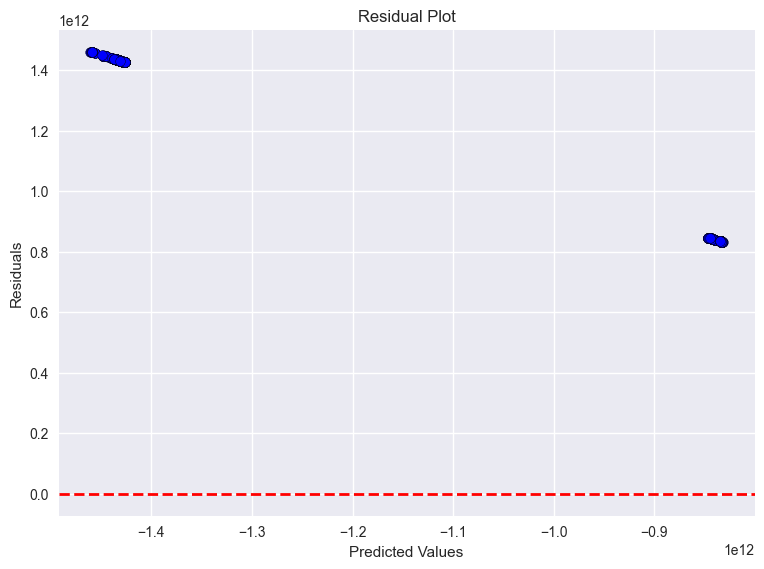

In [ ]:
# Calculate residuals
residuals = y_test - y_hat_test_trimmed

# Residual plot: residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_test_trimmed, residuals, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
plt.xlabel('Predicted Values')  # X-axis: Predicted values from the model
plt.ylabel('Residuals')  # Y-axis: Difference between actual and predicted values
plt.title('Residual Plot')  # Title of the plot
plt.show()

## 7. Build the LASSO Regression Model(10 points)

(a)  Build a LASSO regression model using all the variables that you used initially in your multiple linear regression model. You are advised to use the grid search CV(5 fold) on training data to find the best value of lambda. Then report the following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?


In [ ]:
#Riccardo
alpha_values = np.arange(0.000001, 10000, 0.1)

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

lasso_model = Lasso()

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

KeyboardInterrupt: 

In [ ]:
#Riccardo
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

y_pred = lasso_best.predict(X_test_scaled)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_r2 = r2_score(y_test, y_pred)
lasso_mape = mean_absolute_percentage_error(y_test, y_pred)


print(f"RMSE: {lasso_rmse:.4f}")
print(f"MAPE: {lasso_mape:.4f}")
print(f"R2: {lasso_r2:.4f}")

(b) Identify the variables with the non zero regression coefficients. Are they the same as the one that is statistically insignificant in multiple linear regression model?

In [ ]:
#Riccardo
lasso_coefficients = pd.Series(lasso_best.coef_, index=X.columns)
non_zero_coefficients = lasso_coefficients[lasso_coefficients != 0]

print("Variables with Non-Zero Coefficients in LASSO Regression:")
print(non_zero_coefficients)

(c) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [ ]:
#Riccardo
intercept = lasso_best.intercept_
equation = "SalePrice = {:.4f}".format(intercept)  # Intercept

for var, coef in non_zero_coefficients.items():
    equation += " + {:.4f} * {}".format(coef, var)

print("LASSO Regression Equation:")
print(equation)

## 8. Build the Ridge Regression Model(10 points)

(a)  Build the Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best lambda obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values? 

In [ ]:
#Riccardo
ridge = Ridge()

alpha_values = np.arange(0.000001, 1000, .01)

param_grid = {'alpha': alpha_values}

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best alpha value: {best_alpha}")
print(f"Best score (neg mean squared error): {best_score}")

In [ ]:
#Riccardo
ridge_best = Ridge(alpha=best_alpha)

ridge_best.fit(X_train_scaled, y_train)

y_pred_test = ridge_best.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
ridge_r2 = r2_score(y_test, y_pred_test)
ridge_mape = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"RMSE: {ridge_rmse}")
print(f"R2: {ridge_r2}")
print(f"MAPE: {ridge_mape}")

(b) Identify the regression coefficients of all variables. What is the difference you noticed between the Lasso and the Ridge regression coefficients?


In [ ]:
# Riccardo
ridge_coefficients = pd.Series(ridge_best.coef_, index=X.columns)
coeff_comparison = pd.DataFrame({'LASSO': lasso_coefficients, 'Ridge': ridge_coefficients})
print("Comparison of LASSO and Ridge Coefficients:")
print(coeff_comparison)

(c) Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable. Note: Since the value of coefficient may be very small, you may round the coefficient to two decimal places and use the non zero coefficients.

In [ ]:
#Riccardo
intercept = round(ridge_best.intercept_, 2)  # Round intercept
equation = f"SalePrice = {intercept}"

for var, coef in ridge_coefficients.items():
    equation += f" + ({coef}) * {var}"

print("Ridge Regression Equation:")
print(equation)

## 9. Build the Kernel Ridge Regression Model(10 points)

https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

(a)  Build the Kernel Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best values of tuning parameters obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?


In [ ]:
# Riccardo
kr = KernelRidge()

param_grid = {
    'alpha': np.logspace(-4, 2, 50),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'degree': [2, 3, 4], 
    'gamma': np.logspace(-4, 2, 50)
}

grid_search = GridSearchCV(kr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters from GridSearchCV:", best_params)

In [ ]:
# Riccardo
kr_best = KernelRidge(**best_params)
kr_best.fit(X_train_scaled, y_train)

In [ ]:
#Riccardo
y_pred = kr_best.predict(X_test_scaled)

kernel_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
kernel_mape = mean_absolute_percentage_error(y_test, y_pred)
kernel_r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

(b) By conducting the error analysis, what is the difference you noticed with the previous models?

(c)  Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable, if possible.

In [ ]:
#Riccardo
if best_params['kernel'] == 'linear':
    coefficients = pd.Series(kr_best.coef_, index=X.columns)
    intercept = kr_best.intercept_
    equation = f"SalePrice = {intercept} + " + " + ".join([f"({coef}) * {var}" for var, coef in coefficients.items()])
    print("Kernel Ridge Regression Equation:", equation)

## 10. Model Comparison and Conclusion (20 points)

 (a) Create the visualizations of the residuals from the multiple regression, LASSO regression, Ridge regression and Kernel Ridge regression. You can create several visuals that are useful to gain insights on the residuals of each models separately or together. Explain what you observe from these graphs.
 
 (b) Study the performance scores obtained from all three models and explain which model the company need to choose for deployment and why? Provide the support for your resoning/decision with the appropriate graphs and tables with a clear explanation.